https://mset.space - платформа для проведения анализа данных, построения моделей и внедрения моделей в продукцию.


https://mset.space - platform for data analysis, model building and implementation into production.


Ноутбуки для платформы mset.space
https://github.com/MindSetLib/MS-Education

Low code ML - библиотека машинного обучения
https://github.com/MindSetLib/Insolver


Телеграм канал платформы
https://t.me/msetspace

Связь с разработчиками:
telegram: @frankshikhaliev
email: request@mind-set.ru

## Обучающий ноутбук по PyTorch

**Подготовил:** Гайфуллин Дмитрий, декабрь 2020 г.

### Описание ноутбука

В данном ноутбуке будет рассмотрен современный фреймворк глубокого обучения **PyTorch.**\
**Цель ноутбука:** введение в PyTorch и ознакомление с данной библиотекой для понимания ее возможностей и особенностей. Также будет рассмотрено отличие PyTorch от других фреймворков глубокого обучения таких, как TensorFlow, Mxnet и Teano.

### PyTorch

<p style="text-align: center;"> <img src="https://www.meme-arsenal.com/memes/01702242ef6311ff4c7ab0104c92bb42.jpg" width=400 height=100> </p>

Как указано на главной странице фреймворка: 
>***PyTorch*** - open-source фреймворк машинного обучения, который ускоряет путь от исследовательского ресерча до производственного развертывания.

PyTorch является аналогом фреймворка Torch7 для языка Python. Разработка его началась в недрах Facebook ещё в 2012 году, всего на год позже появления самого Torch7, но открытым и доступным широкой публике PyTorch стал лишь в 2017 году. С этого момента фреймворк очень быстро набирает популярность и привлекает внимание всё большего числа исследователей.

По своей сути, **PyTorch предоставляет две основные функции:**
   - n-мерный тензор, схожий с numpy, но который может работать на графических процессорах (GPU); 
   - автоматическое дифференцирование для построения и обучения нейронных сетей.

Также указано, что ключевыми возможностями данного фреймворка являются:
   - production ready (возможность развертывания в продакте);
   - distributed training (распределенность вычислений);
   - robust ecosystem (надежная экосистема);
   - cloud support (поддерживается на облачных платформах).
   
В целом, устройство PyTorch можно выразить через выражение:
$$PyTorch = NumPy + CUDA + Autograd$$
   
### Let's start!)

In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Для установки PyTorch запустите данную команду
# !conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch

In [3]:
# импортируем PyTorch и посмотрим на установленную версию
import numpy as np
import math
from matplotlib import pyplot as plt

import torch
torch.__version__

'1.7.1'

### Тензоры

Тензоры — подобные матрице структуры данных, которые являются неотъемлемыми компонентами в библиотеках глубокого обучения и используются для эффективных вычислений. По своей сути, тензор - многомерный вектор, например:

`x = np.array([1,2,3])` -- одномерный вектор = тензор (PyTorch)

`y = np.array([[1, 2, 3], [4, 5, 6]])` -- матрица = двумерный тензор размерностью (2, 3) 

`z = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],  
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]], 
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])` -- "куб" (3, 3, 3) = трехмерный тензор размерностью (3, 3, 3)
               
Как видно, тензоры и нампаевские массивы очень схожи, но в чем преимущество PyTorch?\
Самым главным преимуществом PyTorch перед NumPy является то, что PyTorch позволяет проводить вычисления на графическом процессоре (GPU), что ускоряет процесс вычисления более, чем в 50 раз.

PyTorch предоставляет разные типы тензоров:

In [4]:
# типы тензоров
torch.HalfTensor      # 16 бит, floating point
torch.FloatTensor     # 32 бита, floating point
torch.DoubleTensor    # 64 бита, floating point

torch.ShortTensor     # 16 бит, integer, signed
torch.IntTensor       # 32 бита, integer, signed
torch.LongTensor      # 64 бита, integer, signed

torch.CharTensor      # 8 бит, integer, signed
torch.ByteTensor      # 8 бит, integer, unsigned

torch.ByteTensor

Создадим пару тензоров

In [5]:
# создадим тензор
tensor = torch.Tensor([1, 2]) # передаем в качестве аргумента готовый вектор
tensor

tensor([1., 2.])

In [6]:
# посмотрим на размер тензора
tensor.shape

torch.Size([2])

In [7]:
float_tensor = torch.FloatTensor(1, 2) # 1 аргумент - количество строк, 2 - количество столбцов
float_tensor # по умолчанию тензор заполняется случайными числами

tensor([[1.8033e+23, 3.0879e-41]])

In [8]:
# создадим 
int_tensor = torch.IntTensor(1, 2, 3)
int_tensor

tensor([[[-1837380320,       32700, -1837380320],
         [      32700,          32,           0]]], dtype=torch.int32)

In [9]:
int_tensor.shape

torch.Size([1, 2, 3])

In [10]:
# также можно заполнить тензор случайными числами следующим образом
rand_tensor_1 = torch.rand(5)
rand_tensor_1

tensor([0.6175, 0.4540, 0.1432, 0.4271, 0.8482])

In [11]:
rand_tensor_2 = torch.rand((2,3))
rand_tensor_2

tensor([[0.9436, 0.0456, 0.6025],
        [0.8490, 0.9855, 0.7423]])

Создание тензоров, состоящих из нулей:

In [12]:
# создадим тезнор и заполним его нулями
tensor_1 = torch.FloatTensor(3,3)
tensor_1

tensor([[-7.9454e-28,  4.5822e-41, -7.9454e-28],
        [ 4.5822e-41,  4.4842e-44,  0.0000e+00],
        [ 1.1210e-43,  0.0000e+00,  0.0000e+00]])

In [13]:
tensor_1.zero_()

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [14]:
# можно сразу создать тензор, состоящий из нулей
tensor_2 = torch.zeros(3, 3)
tensor_2

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [15]:
# создадим новый тензор из нулей с формой и типом данных указанного тензора
tensor_3 = torch.zeros_like(tensor_1)
tensor_3

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Изменение типа тензора:

In [16]:
tensor = torch.rand(5)
tensor

tensor([0.1658, 0.5108, 0.9994, 0.6749, 0.6769])

In [17]:
# приведем тензор к типу IntTensor
tensor.type_as(torch.IntTensor())

tensor([0, 0, 0, 0, 0], dtype=torch.int32)

In [18]:
# заметим, что type_as создает новый тензор, старый остается без изменения
tensor

tensor([0.1658, 0.5108, 0.9994, 0.6749, 0.6769])

In [19]:
tensor.to(torch.int32)

tensor([0, 0, 0, 0, 0], dtype=torch.int32)

In [20]:
tensor

tensor([0.1658, 0.5108, 0.9994, 0.6749, 0.6769])

Индексирование:

In [21]:
# к элементам тензора можно обращаться также, как и к обычным массивам 
tensor[0]

tensor(0.1658)

In [22]:
# можно делать срезы
tensor[1:3]

tensor([0.5108, 0.9994])

Изменение формы тензора:

In [23]:
# создадим тензор
tensor = torch.randn((3,4))
tensor

tensor([[ 1.4168,  1.7366, -0.5919, -0.2677],
        [-0.9903, -1.3712,  0.0935,  0.2831],
        [-1.0303, -0.6102, -0.1128, -0.1233]])

In [24]:
# воспользуемся методом reshape для изменения формы тензора
print(tensor.reshape(-1))
print(tensor)

tensor([ 1.4168,  1.7366, -0.5919, -0.2677, -0.9903, -1.3712,  0.0935,  0.2831,
        -1.0303, -0.6102, -0.1128, -0.1233])
tensor([[ 1.4168,  1.7366, -0.5919, -0.2677],
        [-0.9903, -1.3712,  0.0935,  0.2831],
        [-1.0303, -0.6102, -0.1128, -0.1233]])


In [25]:
# также мы можем воспользоваться методом view
# метод view создает новый тензор, старый остается без изменений
print(tensor.view(-1))
print(tensor)
print(tensor.stride())

tensor([ 1.4168,  1.7366, -0.5919, -0.2677, -0.9903, -1.3712,  0.0935,  0.2831,
        -1.0303, -0.6102, -0.1128, -0.1233])
tensor([[ 1.4168,  1.7366, -0.5919, -0.2677],
        [-0.9903, -1.3712,  0.0935,  0.2831],
        [-1.0303, -0.6102, -0.1128, -0.1233]])
(4, 1)


In [26]:
# попробуем изменить размер тензора на 3x4
# в результате мы должны получить ошибку, так как тензор содержит всего 9 элементов
tensor.view(4,3)

tensor([[ 1.4168,  1.7366, -0.5919],
        [-0.2677, -0.9903, -1.3712],
        [ 0.0935,  0.2831, -1.0303],
        [-0.6102, -0.1128, -0.1233]])

In [27]:
# также мы можем использовать параметр "-1"
# он используется, когда вы не знаете, сколько строк/столбцов вам нужно, но знаете количество столбцов/строк, 
# тогда вы можете указать это с помощью параметра -1
tensor.view(-1,1)

tensor([[ 1.4168],
        [ 1.7366],
        [-0.5919],
        [-0.2677],
        [-0.9903],
        [-1.3712],
        [ 0.0935],
        [ 0.2831],
        [-1.0303],
        [-0.6102],
        [-0.1128],
        [-0.1233]])

In [28]:
# попробуем трехмерный тензор превратить в одномерный
tensor = torch.rand((2,2,2))
tensor

tensor([[[0.7779, 0.9364],
         [0.3469, 0.9469]],

        [[0.2089, 0.0278],
         [0.0338, 0.2659]]])

In [29]:
tensor.shape

torch.Size([2, 2, 2])

In [30]:
tensor.view(-1)

tensor([0.7779, 0.9364, 0.3469, 0.9469, 0.2089, 0.0278, 0.0338, 0.2659])

Конкатенация тензоров:

In [31]:
# также мы можем объединять тензоры с помощью метода torch.cat()
x = torch.rand(1, 1, 1)
y = torch.rand(1, 1, 1)
print('X:', x)
print('Y:', y)
print('-----')
print(torch.cat([x, y], dim=0)) # конкатенация по 0 измерению
print('-----')
print(torch.cat([x, y], dim=1)) # конкатенация по 1 измерению
print('-----')
print(torch.cat([x, y], dim=2)) # конкатенация по 2 измерению

X: tensor([[[0.7995]]])
Y: tensor([[[0.6858]]])
-----
tensor([[[0.7995]],

        [[0.6858]]])
-----
tensor([[[0.7995],
         [0.6858]]])
-----
tensor([[[0.7995, 0.6858]]])


In [32]:
# также можно использовать метод torch.stack()
torch.stack([x,y], dim=0)

tensor([[[[0.7995]]],


        [[[0.6858]]]])

Арифметические операции с тензорами:


| Оператор | Аналог |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

Все операции вычисляются поэлементно.

In [33]:
a = torch.rand((2, 2))
b = torch.rand((2, 2))
print(a, '\n')
print(b)

tensor([[0.1475, 0.7675],
        [0.5863, 0.2290]]) 

tensor([[0.8044, 0.5016],
        [0.5108, 0.9632]])


In [34]:
# сложение
a + b

tensor([[0.9520, 1.2691],
        [1.0971, 1.1922]])

In [35]:
torch.add(a, b)

tensor([[0.9520, 1.2691],
        [1.0971, 1.1922]])

In [36]:
# вычитание
a - b

tensor([[-0.6569,  0.2659],
        [ 0.0755, -0.7342]])

In [37]:
torch.sub(a, b)

tensor([[-0.6569,  0.2659],
        [ 0.0755, -0.7342]])

In [38]:
# умножение
a * b

tensor([[0.1187, 0.3850],
        [0.2995, 0.2206]])

In [39]:
torch.mul(a, b)

tensor([[0.1187, 0.3850],
        [0.2995, 0.2206]])

In [40]:
# деление
a / b

tensor([[0.1834, 1.5301],
        [1.1478, 0.2378]])

In [41]:
torch.div(a, b)

tensor([[0.1834, 1.5301],
        [1.1478, 0.2378]])

In [42]:
# стоит заметить, что тензоры не изменились
print(a)
print(b)

tensor([[0.1475, 0.7675],
        [0.5863, 0.2290]])
tensor([[0.8044, 0.5016],
        [0.5108, 0.9632]])


Сравнение тензоров:

In [43]:
a = torch.IntTensor([[1, 2, 3], [-1, -2, -3], [100, 200, 300]])
b = torch.IntTensor([[1, 2, 3], [-1, -2, -3], [0, 0, 0]])
print(a, '\n')
print(b)

tensor([[  1,   2,   3],
        [ -1,  -2,  -3],
        [100, 200, 300]], dtype=torch.int32) 

tensor([[ 1,  2,  3],
        [-1, -2, -3],
        [ 0,  0,  0]], dtype=torch.int32)


In [44]:
a == b # сравнение осуществляется поэлементно

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

In [45]:
a > b

tensor([[False, False, False],
        [False, False, False],
        [ True,  True,  True]])

In [46]:
a < b

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [47]:
# найдем элементы тензора а, которые больше элементов тензора b
a[a > b]

tensor([100, 200, 300], dtype=torch.int32)

In [48]:
# найдем элементы тензора b, которые равны элементам тензора b
b[b == a]

tensor([ 1,  2,  3, -1, -2, -3], dtype=torch.int32)

Применение (поэлементно) к тензору различных функций:

In [49]:
a = torch.rand((2,2))
a

tensor([[0.8693, 0.3627],
        [0.1626, 0.7291]])

In [50]:
a.sin()

tensor([[0.7639, 0.3548],
        [0.1619, 0.6662]])

In [51]:
a.cos()

tensor([[0.6454, 0.9350],
        [0.9868, 0.7458]])

In [52]:
a.tan()

tensor([[1.1836, 0.3794],
        [0.1641, 0.8932]])

In [53]:
a.exp()

tensor([[2.3852, 1.4371],
        [1.1766, 2.0732]])

In [54]:
a.log()

tensor([[-0.1401, -1.0143],
        [-1.8164, -0.3160]])

Применение агрегирующих функций:

In [55]:
a

tensor([[0.8693, 0.3627],
        [0.1626, 0.7291]])

In [56]:
print(a.sum()) # сумма всех элементов
print(a.sum(dim=0)) # сумма по столбцам
print(a.sum(dim=1)) # сумма по строкам

tensor(2.1236)
tensor([1.0319, 1.0917])
tensor([1.2319, 0.8917])


In [57]:
a.mean(dim=0)

tensor([0.5159, 0.5459])

In [58]:
a.max()

tensor(0.8693)

In [59]:
a.min()

tensor(0.1626)

Матричные операции с тензорами:

In [60]:
# транспонирование тензора
a = torch.rand(3)
b = torch.rand(3)
c = torch.rand((2,3))
d = torch.rand((3,2))
print(a, '\n')
print(b, '\n')
print(c, '\n')
print(d)

tensor([0.5248, 0.9188, 0.9577]) 

tensor([0.7332, 0.5834, 0.0655]) 

tensor([[0.4901, 0.9443, 0.9788],
        [0.6482, 0.3726, 0.4870]]) 

tensor([[7.1075e-01, 4.0760e-01],
        [8.1547e-01, 1.6113e-01],
        [8.1325e-04, 3.9649e-02]])


In [61]:
c.T

tensor([[0.4901, 0.6482],
        [0.9443, 0.3726],
        [0.9788, 0.4870]])

In [62]:
c

tensor([[0.4901, 0.9443, 0.9788],
        [0.6482, 0.3726, 0.4870]])

In [63]:
# скалярное произведение
a.dot(b)

tensor(0.9835)

In [64]:
a @ b

tensor(0.9835)

In [65]:
# умножение матриц
c.mm(d)

tensor([[1.1191, 0.3907],
        [0.7649, 0.3435]])

In [66]:
c @ d

tensor([[1.1191, 0.3907],
        [0.7649, 0.3435]])

Преобразование массива NumPy в Tensor и наоборот:

In [67]:
a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

In [68]:
b = torch.from_numpy(a)
b

tensor([1, 2, 3, 4])

In [69]:
# заметим, что переменные a и b имеют один и тот же адрес в памяти,
# поэтому преобразование одного массива приведет к изменению другого
a -= a
a

array([0, 0, 0, 0])

In [70]:
b

tensor([0, 0, 0, 0])

In [71]:
# Tensor -> NumPy
tensor = torch.FloatTensor(1, 2, 3)
tensor

tensor([[[-7.9454e-28,  4.5822e-41,  1.7951e+23],
         [ 3.0879e-41,  4.4842e-44,  0.0000e+00]]])

In [72]:
np_array = tensor.numpy()
np_array

array([[[-7.9454471e-28,  4.5822460e-41,  1.7950613e+23],
        [ 3.0879013e-41,  4.4841551e-44,  0.0000000e+00]]], dtype=float32)

In [73]:
np_array -= np_array
np_array

array([[[0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [74]:
tensor

tensor([[[0., 0., 0.],
         [0., 0., 0.]]])

### Метод обратного распространения ошибки (Backpropogation)

<p style="text-align: center;"> <img src="https://neurohive.io/wp-content/uploads/2018/07/backpropagation-e1543313177481.jpeg" width=600 height=150> </p>

**Метод обратного распространения ошибки** — это способ обучения нейронной сети. Цели обратного распространения просты: отрегулировать каждый вес пропорционально тому, насколько он способствует общей ошибке. Если мы будем итеративно уменьшать ошибку каждого веса, в конце концов у нас будет ряд весов, которые дают хорошие прогнозы. Метод обратного распространения ошибки является модификацией градиентного спуска.\
Этот простой метод распространяется на любую переменную внутри функции, и позволяет нам в точности определить влияние каждой переменной на общий результат.

**Разберем небольшой пример.**\
Напишем простую нейросеть: попробуем подогнать полином третьей степени к функции синуса с помощью методов прямого и обратного распространения ошибки. В коде ниже будем использовать методы библиотеки NumPy.\
Полином выглядит следующим образом: $$f(x) = w_0 + w_1 * x + w_2 * x^2 + w_3 * x^3$$ где `w_i` - веса, которые необходимо подобрать таким образом, чтобы ошибка между известными и полученными значениями была минимальной. Изначально инициализируем веса случайными значениями.\
Также зададим скорость обучения `learning rate` = 0.000001. Далее зададим 2000 итераций для поиска наилучшего вектора весов.\
На каждой итерации будем вычислять значение функции с полученными весами, затем ошибку и после этого будем применять метод обратного распространения ошибки. Будем вычислять производную функции потерь по каждому весу:
$${\frac  {\partial{Loss}}{\partial{w}}}
={\frac  {\partial{Loss}}{\partial{y_{pred}}}}\cdot {\frac  {\partial{y_{pred}}}{\partial{w}}}$$\
После этого обновляем веса. Как итог, получаем функцию, приближающую функцию синуса.

99 237.9820417940025
199 170.54520507455888
299 122.97339294974935
399 89.40768186743276
499 65.72001745893877
599 49.00048931439903
699 37.19737540502659
799 28.863717584490374
899 22.978844015597357
999 18.822636996994934
1099 15.886933801279794
1199 13.813077560161233
1299 12.3478891742848
1399 11.312619284389129
1499 10.581048836518356
1599 10.06403935398005
1699 9.69863128055913
1799 9.44035014556497
1899 9.257775721953076
1999 9.12870794884255
Result: y = 0.01857261125576819 + 0.854878927198612 * x + -0.0032040844912053015 * x^2 + -0.09306554772106167 * x^3



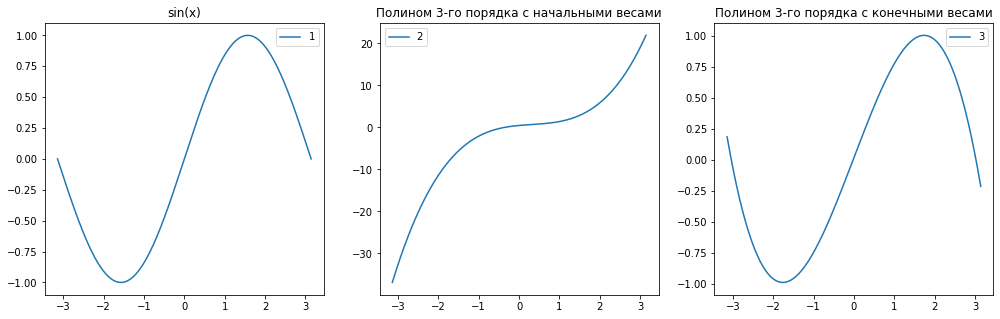

In [75]:
fg, ax = plt.subplots(1, 3, figsize=(17,5))

# значения вектора х - точки в промежутке от -pi до pi
# значения вектора у - значения функции синуса в этих точках
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

ax[0].plot(x, y, label='1')


# инициализируем веса рандомными значениями
w_0 = np.random.randn()
w_1 = np.random.randn()
w_2 = np.random.randn()
w_3 = np.random.randn()

ax[1].plot(x, w_0 + w_1 * x + w_2 * x ** 2 + w_3 * x ** 3, label='2')

# learning_rate - шаг обучения
learning_rate = 1e-6

# зададим 2000 итераций для поиска оптимального вектора весов
for t in range(2000):
    # Forward pass (прямое распространение ошибки): вычисляем значения функции
    y_pred = w_0 + w_1 * x + w_2 * x ** 2 + w_3 * x ** 3

    # вычисляем функцию ошибки
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop (обратное распространение ошибки): вычисляем градиенты весов относительно ошибки
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w_0 = grad_y_pred.sum() # производная потери относительно веса w_0
    grad_w_1 = (grad_y_pred * x).sum() # производная потери относительно веса w_1
    grad_w_2 = (grad_y_pred * x ** 2).sum() # производная потери относительно веса w_2
    grad_w_3 = (grad_y_pred * x ** 3).sum() # производная потери относительно веса w_3

    # обновляем веса
    w_0 -= learning_rate * grad_w_0
    w_1 -= learning_rate * grad_w_1
    w_2 -= learning_rate * grad_w_2
    w_3 -= learning_rate * grad_w_3

print(f'Result: y = {w_0} + {w_1} * x + {w_2} * x^2 + {w_3} * x^3\n')

ax[2].plot(x, w_0 + w_1 * x + w_2 * x ** 2 + w_3 * x ** 3, label='3')

ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_title('sin(x)')
ax[1].set_title('Полином 3-го порядка с начальными весами')
ax[2].set_title('Полином 3-го порядка с конечными весами')
plt.show()

Теперь напишем аналогичную нейросеть, используя PyTorch.

99 1259.5107421875
199 843.826171875
299 566.619873046875
399 381.6647033691406
499 258.193603515625
599 175.72056579589844
699 120.59986877441406
799 83.7367172241211
899 59.067649841308594
999 42.54766082763672
1099 31.476985931396484
1199 24.052568435668945
1299 19.069629669189453
1399 15.722600936889648
1499 13.472538948059082
1599 11.958614349365234
1699 10.939107894897461
1799 10.2518892288208
1899 9.788220405578613
1999 9.475096702575684
Result: y = -0.016440927982330322 + 0.8368980288505554 x + 0.0028363352175801992 x^2 + -0.09050792455673218 x^3


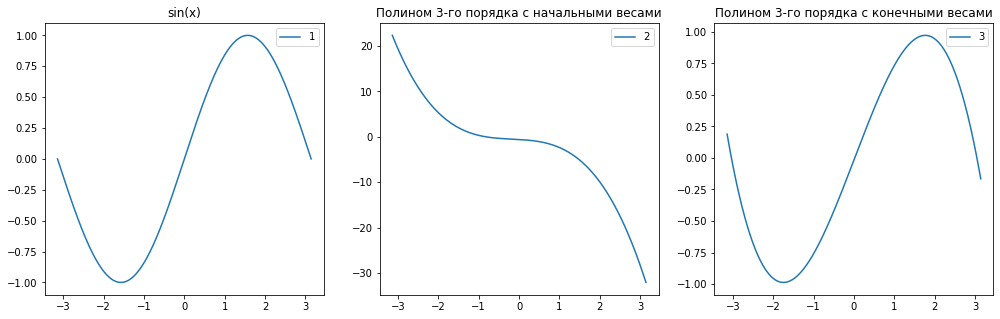

In [76]:
fg, ax = plt.subplots(1, 3, figsize=(17,5))

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

ax[0].plot(x, y, label='1')

# инициализируем веса рандомными значениями
w_0 = torch.randn((), device=device, dtype=dtype)
w_1 = torch.randn((), device=device, dtype=dtype)
w_2 = torch.randn((), device=device, dtype=dtype)
w_3 = torch.randn((), device=device, dtype=dtype)

ax[1].plot(x, w_0 + w_1 * x + w_2 * x ** 2 + w_3 * x ** 3, label='2')

learning_rate = 1e-6
for t in range(2000):
    # Forward pass (прямое распространение ошибки): вычисляем таргет
    y_pred = w_0 + w_1 * x + w_2 * x ** 2 + w_3 * x ** 3

    # вычисляем ошибку
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop (обратное распространение ошибки): вычисляем градиенты весов относительно ошибки
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w_0 = grad_y_pred.sum()
    grad_w_1 = (grad_y_pred * x).sum()
    grad_w_2 = (grad_y_pred * x ** 2).sum()
    grad_w_3 = (grad_y_pred * x ** 3).sum()

    # Обновляем веса
    w_0 -= learning_rate * grad_w_0
    w_1 -= learning_rate * grad_w_1
    w_2 -= learning_rate * grad_w_2
    w_3 -= learning_rate * grad_w_3


print(f'Result: y = {w_0.item()} + {w_1.item()} x + {w_2.item()} x^2 + {w_3.item()} x^3')

ax[2].plot(x, w_0 + w_1 * x + w_2 * x ** 2 + w_3 * x ** 3, label='3')

ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_title('sin(x)')
ax[1].set_title('Полином 3-го порядка с начальными весами')
ax[2].set_title('Полином 3-го порядка с конечными весами')
plt.show()

### Autograd

В примерах выше мы вручную реализовывали прямой и обратный проход. Это не трудно сделать для небольшой нейросети, но когда необходимо реализовать многослойную нейронную сеть, такая задача становится очень сложной.\
**Вычислительный граф**\
Под глубоким обучением как правило понимают обучение функции, представляющей собой композицию множества нелинейных преобразований. Такая сложная функция ещё называется потоком или графом вычислений. Фреймворк глубокого обучения должен уметь делать следующее:
1. Определять граф вычислений;
2. Дифференцировать граф вычислений;
3. Вычислять его.

Преимущества использования вычислительного графа в том, что каждый узел является независимым функционирующим куском кода, если получит все необходимые входные данные. Это позволяет  оптимизировать производительность при выполнении расчетов, используя многоканальную обработку, параллельные вычисления.\
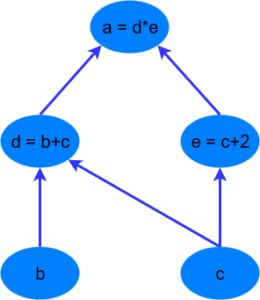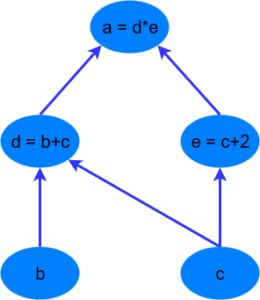

**Автоматическое дифференцирование**\
В PyTorch вычислительный граф строится динамически каждый раз при прямом проходе для того, чтобы затем иметь возможность сделать проход обратный. Подобный подход даёт максимальную гибкость и расширяемость, позволяет использовать в вычислениях все возможности используемого языка программирования и не ограничивает пользователя вообще ничем.\
У нас есть возможность использовать автоматическое дифференцирование (automatic differentiation, AD), которое предоставляет PyTorch. Оно необходимо для вычисление backward passes (обратного прохода). Мы можем взять и продифференцировать граф в любой момент времени в любом его состоянии. В компиляции графа нет совершенно никакой реальной необходимости.

<p style="align: center;"><img src="https://habrastorage.org/web/e3e/c3e/b78/e3ec3eb78d714a7993a6b922911c0866.png" width=700 height=500></p>

**Пакет autograd**\
Пакет **autograd** обеспечивает автоматическое разграничение всех операций на тензорах. Это определяемый-по-исполнению (define-by-run) фреймворк, что означает, что backprop (обратное распространение в нейронной сети) определяется тем, как выполняется ваш код, и что каждая отдельная итерация может отличаться.\
Если вы установите его атрибут `.requires_grad` равным True, тогда он начнет отслеживать все операции над ним. Когда вы закончите вычисления, вы можете вызвать `.backward()` и получить все градиенты вычисленные автоматически. Градиент для этого тензора будет накапливается в атрибуте `.grad`.\
Чтобы остановить отслеживание тензора в истории вычислений, вы можете вызвать `.detach()`.\
Чтобы предотвратить отслеживание истории (и использование памяти), вы также можете обернуть блок кода в `with torch.no_grad()`. Это может быть особенно полезно при оценке модели, потому что модель может иметь обучаемые параметры с `requires_grad = True`, но для которых нам не нужны градиенты.

Есть еще один класс, который очень важен для **autograd** реализации - `Function`.\
Tensor и Function связаны между собой и создают ациклический граф, который кодирует полную историю вычислений. Каждый тензор имеет `.grad_fn` атрибут, который ссылается на Function, которая создала Tensor (за исключением тензоров, созданных пользователем - их `grad_fn = None`). Если вы хотите вычислить производные, то можете вызвать `.backward()`. После вычисления градиентов рекомендуется их обнулить, так как при дальнейшем вычислении градиентов они будут накапливаться. 

Посмотрим на примерах.

In [77]:
# создадим тензор с параметром requires_grad=True
tensor = torch.rand((3, 3), requires_grad=True)
tensor

tensor([[0.5814, 0.9572, 0.0944],
        [0.9562, 0.4699, 0.0080],
        [0.9645, 0.9155, 0.1452]], requires_grad=True)

In [78]:
# как видно выше, у тензора установлен параметр requires_grad=True
# выполним операцию на тензоре
new_tensor = tensor + 2
new_tensor

tensor([[2.5814, 2.9572, 2.0944],
        [2.9562, 2.4699, 2.0080],
        [2.9645, 2.9155, 2.1452]], grad_fn=<AddBackward0>)

In [79]:
# после проведения операции сложения у нового тензора установлен параметр grad_fn=<AddBackward0>,
# который означает, что тензор создан с помощью операции сложения
new_tensor.grad_fn

In [80]:
# если посмотреть на параметр grad_fn у первого тезнора, который был создан самостоятельно, то его значение будет None
print(tensor.grad_fn)

None


In [81]:
# выполним еще несколько операций с тензорами
new_tensor_2 = new_tensor ** 2
new_tensor_2

tensor([[6.6636, 8.7449, 4.3864],
        [8.7392, 6.1002, 4.0322],
        [8.7881, 8.5003, 4.6017]], grad_fn=<PowBackward0>)

In [82]:
out = new_tensor_2.mean()
out

tensor(6.7285, grad_fn=<MeanBackward0>)

In [83]:
# отметим, что параметр requires_grad можно изменять inplace
print(tensor.requires_grad) # True
tensor.requires_grad_(False) # меняем на False
print(tensor.requires_grad)

True
False


In [84]:
# также мы можем остановить отслеживание операций на тензорах, у которых установлен requires_grad=True, с помощью with torch.no_grad()
tensor = torch.rand(1, requires_grad=True)
print(tensor.requires_grad)
print((tensor ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


Используем backpropogation для вычисления градиентов. Для этого в autograd реализован метод `backward`.\
Рассмотрим простой пример.

In [85]:
x = torch.Tensor([1.]) # тензор, состоящий из одного значения - единицы
x.requires_grad_(True) # указываем
y = x**2 # функция y
y.backward() # находим сумму градиентов по заданным тензорам
print(x.grad) # находим значение градиента (dy/dx) при x=1

tensor([2.])


In [86]:
# рассмотрим еще один пример
x = torch.Tensor([1., 2.]) # тензор, состоящий из двух скаляров
x.requires_grad_(True)
y = sum(x**2)
y.backward()
print(x.grad)

tensor([2., 4.])


In [87]:
# рассмотрим теперь функцию, состоящую из двух аргументов x и y
x = torch.rand(1, requires_grad=True)
y = torch.rand(1, requires_grad=True)
print(x, y)
z = x * (y**2)
z.backward()
print('x.grad:', x.grad) # dz/dx
print('y.grad:', y.grad) # dz/dy

tensor([0.3738], requires_grad=True) tensor([0.4097], requires_grad=True)
x.grad: tensor([0.1679])
y.grad: tensor([0.3063])


Теперь попробуем применить, описанные выше методы, к задаче, которую мы решали выше: подгоним полином третьей степени к функции синуса.

In [88]:
#fg, ax = plt.subplots(1, 3, figsize=(17,5))

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

#ax[0].plot(x, y, label='1')

# создаем тензоры для весов и устанавливаем requires_grad=True
w_0 = torch.randn((), device=device, dtype=dtype, requires_grad=True)
w_1 = torch.randn((), device=device, dtype=dtype, requires_grad=True)
w_2 = torch.randn((), device=device, dtype=dtype, requires_grad=True)
w_3 = torch.randn((), device=device, dtype=dtype, requires_grad=True)

#ax[1].plot(x, w_0 + w_1 * x + w_2 * x ** 2 + w_3 * x ** 3, label='2')

learning_rate = 1e-6
for t in range(2000):
    # Forward pass
    y_pred =  w_0 + w_1 * x + w_2 * x ** 2 + w_3 * x ** 3

    # loss - это тензор размера (1,)
    # loss.item() возвращает значение, лежащее в loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # используем автоград для вычисления обратного прохода
    loss.backward()

    # обновляем веса
    with torch.no_grad():
        w_0 -= learning_rate * w_0.grad
        w_1 -= learning_rate * w_1.grad
        w_2 -= learning_rate * w_2.grad
        w_3 -= learning_rate * w_3.grad

        # обнуляем градиенты
        w_0.grad = None
        w_1.grad = None
        w_2.grad = None
        w_3.grad = None

print(f'Result: y = {w_0.item()} + {w_1.item()} x + {w_2.item()} x^2 + {w_3.item()} x^3')

#ax[2].plot(x, w_0 + w_1 * x + w_2 * x ** 2 + w_3 * x ** 3, label='3')

#ax[0].legend()
#ax[1].legend()
#ax[2].legend()

#ax[0].set_title('sin(x)')
#ax[1].set_title('Полином 3-го порядка с начальными весами')
#ax[2].set_title('Полином 3-го порядка с конечными весами')
#plt.show()

99 4480.955078125
199 2979.19140625
299 1982.3021240234375
399 1320.3834228515625
499 880.7603149414062
599 588.6942749023438
699 394.59954833984375
799 265.5705261230469
899 179.7664337158203
999 122.6860122680664
1099 84.69950103759766
1199 59.409393310546875
1299 42.56484603881836
1399 31.340694427490234
1499 23.85792350769043
1599 18.866941452026367
1699 15.536233901977539
1799 13.312274932861328
1899 11.826433181762695
1999 10.83315658569336
Result: y = 0.02111559920012951 + 0.8176388740539551 x + -0.0036427925806492567 x^2 + -0.08776847273111343 x^3


**Variable в PyTorch**

В отличие от TensorFlow, в PyTorch `Variable` функционирует иначе, так как данный метод основан на автограде, который позволяет define-by-run программирование.\
Класс Variable предоставляет практически такой же API, как и Tensor, но дополняет его возможностью взаимодействия с torch.autograd.Function именно ради автоматического дифференцирования. Точнее, в Variable записывается история операций над Tensor. Пользоваться torch.autograd.Variable очень просто. Нужно просто передать ему Tensor и сообщить torch, требует ли эта переменная записывать градиенты: requires_grad=True.\
Для расчета градиентов и выполнения автоматического дифференцирования к Variable применяют функцию backward(). Так вычисляется градиент этого тензора относительно листьев расчетного графа (всех входных значений, повлиявших на данное). Затем эти градиенты собираются в член grad класса Variable.\
Рассмотрим пример.

In [89]:
from torch.autograd import Variable

x = Variable(torch.ones(1, 5)) # создаем вектор х
w = Variable(torch.randn(5, 1), requires_grad=True) # создаем вектор весов w и указываем requires_grad=True, для возможности вычисления градиента
b = Variable(torch.randn(1), requires_grad=True) # создаем bias и аналогично requires_grad=True
y = x.mm(w) + b # y = x*w + b
y.backward() # метод обратного распр ошибки
w.grad # dy/dw

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

### Модуль nn и optim

PyTorch предоставляет возможность создания нейросетей с помощью модуля `nn`, в частности, `nn.Module`, где представлено множество моделей, хорошо работающих "из коробки". Модуль torch.nn также предоставляет ряд функций потерь, естественно, важных для оценки полученных результатов.\
Также PyTorch предоставляет пакет torch.optim, в котором определяется ряд распространенных алгоритмов оптимизации таких, как SGD, AdaGrad, RMSProp, Adam и другие.\
Попробуем данные модули на практике.

4 15.514005661010742
9 6.397979736328125
14 2.7048983573913574
19 1.2087388038635254
24 0.6025886535644531
29 0.35699543356895447
34 0.2574698328971863
39 0.21711887419223785
44 0.20074036717414856
49 0.1940736025571823
54 0.1913413554430008
59 0.19020305573940277


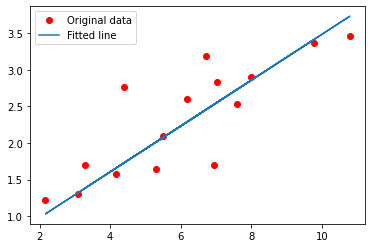

In [90]:
import torch.nn as nn

# гиперпараметры
input_size = 1
output_size = 1
learning_rate = 0.001

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# модель линейной регрессии
model = nn.Linear(input_size, output_size)

# Функция ошибки MSE и optimizer - SGD
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


for t in range(60):
    # конвертируем массивы в тензоры
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward pass и оптимизация
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (t+1) % 5 == 0:
        print (t, loss.item())

# строим график
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

**Плюсы PyTorch**

   - Динамический вычислительный граф;
   - Благодаря архитектуре фреймворка, процесс создания модели достаточно прост и прозрачен;
   - Режим по умолчанию “define-by-run” – отсылка к традиционному программированию;
   - Фреймворк поддерживает популярные инструменты для дебага, такие как pdb, ipdb или дебаггер PyCharm;
   - Он имеет много предварительно обученных моделей и готовых модульных частей, которые легко комбинировать.

**Минусы PyTorch**

   - На данный момент меньшая поддержка по сравнению с Tensor
   - Недостаточно интерфейсов для мониторинга и визуализации, как TensorBoard – однако он имеет внешнее подключение к Tensorboard.

### Ссылки на дополнительные ресурсы:

1. Главная страница PyTorch: https://pytorch.org/
2. Методы в Numpy и PyTorch: https://github.com/torch/torch7/wiki/Torch-for-Numpy-users
3. Статья на Хабре: https://habr.com/ru/post/334380/
4. Статья на Хабре: https://habr.com/ru/company/piter/blog/354912/

## PyTorch Lightning

### Что это?

**PyTorch** достаточно прост в использовании при построении сложных моделей машинного обучения. Но как только исследование усложняется и смешиваются такие вещи, как обучение с несколькими графическими процессорами, 16-битная точность и обучение на TPU, тогда очень часто возникают трудности и ошибки.

**PyTorch Lightning** был разработан для инкапсуляции моделей, взаимодействующих друг с другом. Lightning построен для более сложных исследовательских и производственных случаев современного мира, где многие модели взаимодействуют друг с другом, используя сложные правила. PyTorch Lightning структурирует ваш код, написанный на обычном PyTorch так, чтобы он (код) мог абстрагировать детали обучения. Это делает исследования более масштабируемыми и быстрыми.

Второй ключевой принцип PyTorch Lightning заключается в том, что железо и “научный” код должны быть разделены. Lightning разработан так, чтобы использовать массивные вычисления масштабно, не раскрывая пользователю ни одной из этих абстракций. Делая это разделение, вы получаете новые возможности, которые раньше были невозможны.

Данный фреймворк предназначен для профессиональных исследователей, чтобы опробовать самые сложные идеи на самых больших вычислительных ресурсах, не теряя при этом никакой гибкости.

### Ключевые возможности

   - возможность запускать код на GPU, CPU и TPU;
   - сохраняет гибкость, предоставляемую фреймворком PyTorch, при этом сокращает множество шаблонного кода засчет его абстрагирования;
   - возможность устанавливать контрольные точки (чекпоинты);
   - 16-битная точность;
   - распределенное обучение;
   - возможность делать код более читабельным, путем разделения исследовательского кода и инженерного;
   - сокращение ошибок засчет автоматизации процесса обучения и сложной инженерии;
   - Lightning интегрируется с популярными фреймворками визуализации (например, Tensorboard).
   
**Установка**


In [91]:
# установка PyTorch Lightning
#!pip install pytorch-lightning

In [92]:
# импортируем библиотеку
import pytorch_lightning as pl

pl.__version__

'1.1.4'

**Рассмотрим возможности PyTorch Lightning на примере.**

Обычная задача в машинном обучениее содержит следующие ключевые компоненты:
   - модель;
   - данные;
   - функция ошибки;
   - оптимизатор.

**Модель**

Создадим 3-слойную полносвязную нейронную сеть, которая принимает в качестве входных данных изображение размером 28x28 и выводит распределение вероятностей по 10 возможным лейблам. Для этого используем датасет MNIST.

Снала создадим модель, используя PyTorch.

In [93]:
import torch
from torch import nn

class MNISTClassifier(nn.Module):

    def __init__(self):
        super(MNISTClassifier, self).__init__()

        # mnist images (1, 28, 28)
        self.layer_1 = torch.nn.Linear(28 * 28, 128)
        self.layer_2 = torch.nn.Linear(128, 256)
        self.layer_3 = torch.nn.Linear(256, 10)

    def forward(self, x):
        batch_size, channels, width, height = x.size()

        # (b, 1, 28, 28) -> (b, 1*28*28)
        x = x.view(batch_size, -1)

        # layer 1
        x = self.layer_1(x)
        x = torch.relu(x)

        # layer 2
        x = self.layer_2(x)
        x = torch.relu(x)

        # layer 3
        x = self.layer_3(x)

        # распределение вероятностей
        x = torch.log_softmax(x, dim=1)

        return x

Данная модель определяет нейросеть, которая принимает в качестве входных данных изображение MNIST и преобразует его в распределение вероятностей по 10 классам для цифр 0-9.

<p style="align: center;"><img src="https://miro.medium.com/max/875/1*DgYiXo_5v3Zp68qGONosWw.png" width=700 height=500></p>


Чтобы преобразовать данную модель к PyTorch Lightning, просто меняем nn.Module на pl.LightningModule.

class MNISTClassifier(**nn.Module**): # PyTorch\
class MNISTClassifier(**pl.LightningModule**): # Pytorch Lightning

In [94]:
# модель на PyTorch Lightning

class LightningMNISTClassifier(pl.LightningModule):

    def __init__(self):
        super(LightningMNISTClassifier, self).__init__()

        # mnist images (1, 28, 28) 
        self.layer_1 = torch.nn.Linear(28 * 28, 128)
        self.layer_2 = torch.nn.Linear(128, 256)
        self.layer_3 = torch.nn.Linear(256, 10)

    def forward(self, x):
        batch_size, channels, width, height = x.size()

        # (b, 1, 28, 28) -> (b, 1*28*28)
        x = x.view(batch_size, -1)

        # layer 1
        x = self.layer_1(x)
        x = torch.relu(x)

        # layer 2
        x = self.layer_2(x)
        x = torch.relu(x)

        # layer 3
        x = self.layer_3(x)

        # распределение вероятностей
        x = torch.log_softmax(x, dim=1)

        return x

Получаем такую же модель как и в PyTorch. Таким образом, мы можем использовать Lightning также как и PyTorch, например, для предсказания:

In [95]:
# PyTorch
x = torch.Tensor(32, 1, 28, 28)
pytorch_model = MNISTClassifier()

pt_out = pytorch_model(x)
pt_out[5]

tensor([-2.3924, -2.2789, -2.2521, -2.3110, -2.3155, -2.3200, -2.2936, -2.2934,
        -2.2850, -2.2900], grad_fn=<SelectBackward>)

In [96]:
# PyTorch Lightning
x = torch.Tensor(32, 1, 28, 28)
lightning_model = LightningMNISTClassifier()

pl_out = lightning_model(x)
pl_out[5]

tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       grad_fn=<SelectBackward>)

**Данные**

Сгенерируем три выборки из MNIST - обучающую, валидационную и тестовую. Этот процесс одинаковый как в PyTorch, так и в Lightning. Данные добавляются в Dataloader, который их загружает, перемешивает и разделяет.\
Таким образом, подготовка данных состоит из 4 этапов:
   - загрузка изображений;
   - преобразование изображений;
   - создание новых выборок;
   - оборачивание каждого набора в DataLoader.
   
Посмотрим на примере.

In [97]:
# PyTorch
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST
import os
from torchvision import datasets, transforms



# Преобразователь
transform=transforms.Compose([transforms.ToTensor(), 
                              transforms.Normalize((0.1307,), (0.3081,))])

# Получение тренировочной, валидационной и тестовой выборки
# train (55,000 изображений), val (5,000 изображений)
mnist_train = MNIST(os.getcwd(), train=True, download=True)
mnist_train, mnist_val = random_split(mnist_train, [55000, 5000])
mnist_test = MNIST(os.getcwd(), train=False, download=True)

# DataLoaders
mnist_train = DataLoader(mnist_train, batch_size=64)
mnist_val = DataLoader(mnist_val, batch_size=64)
mnist_test = DataLoader(mnist_test, batch_size=64)

Таким образом организована загрузка и обработка данных в PyTorch.\
В PyTorch Lightning DataLoaders могут использоваться непосредственно также или с помощью трех дополнительных методов, сгруппированых вместе под LightningDataModule:
   - train_dataloader()
   - val_dataloader()
   - test_dataloader()
   
И также  четвертый метод, предназначенный для подготовки/загрузки данных - prepare_data().\
Lightning использует этот подход, чтобы каждая модель, реализованная с помощью Lightning, следовала одной и той же структуре. Это делает код чрезвычайно читаемым и структурированным. Это означает, что например когда вы столкнетесь с проектом Github, использующим Lightning, вы сможете точно знать, где произошла обработка/загрузка данных.

In [98]:
# PyTorch Lightning
class MNISTDataModule(pl.LightningDataModule):

    def setup(self, stage):
        # преобразователь
        transform=transforms.Compose([transforms.ToTensor(), 
                                      transforms.Normalize((0.1307,), (0.3081,))])

        # получения данных и преобразование данных
        mnist_train = MNIST(os.getcwd(), train=True, download=True, transform=transform)
        mnist_test = MNIST(os.getcwd(), train=False, download=True, transform=transform)

        self.mnist_train, self.mnist_val = random_split(mnist_train, [55000, 5000])
        
    def train_dataloader(self):
        return DataLoader(self.mnist_train, batch_size=64)

    def val_dataloader(self):
        return DataLoader(self.mnist_val, batch_size=64)

    def test_dataloader(self):
        return DataLoader(self,mnist_test, batch_size=64)

**Оптимизатор**

В качестве оптимизатора будем использовать Adam.

In [99]:
# в PyTorch оптимизатору передаются веса оптимизатора, когда мы его инициализируем 
pytorch_model = MNISTClassifier()
optimizer = torch.optim.Adam(pytorch_model.parameters(), lr=1e-3)

In [100]:
# в Lightning всё также, только код завернут в функцию
class LightningMNISTClassifier(pl.LightningModule):

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

**Функция ошибки**

В качестве функции потерь будем использовать кросс-энтропию, так как мы хотим взять наши логарифмы и вычислить расхождение между двумя вероятностными распределениями.\
Cross-entropy == NegativeLogLikelihood(log_softmax)

In [101]:
# PyTorch
from torch.nn import functional as F

def cross_entropy_loss(logits, labels):
    return F.nll_loss(logits, labels)

In [102]:
# Lightning
class LightningMNISTClassifier(pl.LightningModule):

    def cross_entropy_loss(self, logits, labels):
        return F.nll_loss(logits, labels)

Все то же самое.

**Обучение и валидация**

Теперь реализуем тренировочные и валидационные циклы:
   - проходимся по эпохам (эпоха - это полный проход через все наши данные);
   - проходим по batch'ам;
   - делаем предсказание;
   - вычисляем ошибку;
   - применяем метод обратного распространения ошибки;
   - обновляем веса.
   
В виде псевдокода это можно описать следующим образом:
```python

num_epochs = 100
for epoch in range(num_epochs):            
  for batch in dataloader:                 
    x, y = batch

    logits = model(x)                      
    loss = cross_entropy_loss(logits, y)   

    loss.backward()                        
    optimizer.step()                       

    
```

Однако именно здесь Lightning отличается. В PyTorch вы сами пишете цикл for, а это значит, что вы должны помнить о всех мелочах — в этом месте можно наделать много ошибок.
Даже если ваша модель проста, она не будет такой, как только вы начнете совершать более сложные вещи, такие как использование нескольких графических процессоров,, 16-битная точность и т.д.

**Реализация на PyTorch**

```python
num_epochs = 1
for epoch in range(num_epochs):

  # обучение на тренировочных данных
  for train_batch in mnist_train:
    x, y = train_batch

    logits = pytorch_model(x)
    loss = cross_entropy_loss(logits, y)
    print('train loss: ', loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

  # валидация
  with torch.no_grad():
    val_loss = []
    for val_batch in mnist_val:
      x, y = val_batch
      logits = pytorch_model(x)
      val_loss.append(cross_entropy_loss(logits, y).item())

    val_loss = torch.mean(torch.tensor(val_loss))
    print('val_loss: ', val_loss.item())
```

**Реализация на PyTorch Lightning**

Чтобы сделать то же самое в Lightning, мы разделим основные части цикла обучения и цикла валидации на три функции:
   - training_step
   - validation_step
   - test_step
   
```python
    def training_step(self, batch, batch_idx):
        x, y = train_batch
        logits = self.forward(x) 
        loss = self.cross_entropy_loss(logits, y)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = train_batch
        logits = self.forward(x)
        loss = self.cross_entropy_loss(logits, y)
        self.log('val_loss', loss)
        return loss
    
    def test_step(self, batch, batch_idx):
        # Здесь мы просто повторно используем validation_step для тестирования
        return self.validation_step(batch, batch_idx)
```

В этом красота Lightning. Он абстрагирует шаблонный код (not out-of-the-box), но оставляет все другое неизменным. Это означает, что вы все еще пишем на PyTorch, за исключением того, что наш код стал хорошо структурирован. Это повышает читабельность, что помогает с воспроизводимостью!


Чтобы обучить модель Lightning MNIST, мы просто используем `Trainer` для автоматического выполнения всех других процессов, которые нам не нужны из кода PyTorch - который мы должны дублировать в каждом проекте, который мы запускаем, что делает его шаблонным кодом.

Но важно иметь в виду, что данные методы следует называть именно так, как указано в коде ниже. Для того, чтобы `Trainer` мог сделать определенные процессы за вас автоматически.

**Полный код на PyTorch Lightning**

In [103]:
import torch
class LightningMNISTClassifier(pl.LightningModule):

    def __init__(self):
        super().__init__()

        self.layer_1 = torch.nn.Linear(28 * 28, 128)
        self.layer_2 = torch.nn.Linear(128, 256)
        self.layer_3 = torch.nn.Linear(256, 10)

    def forward(self, x):
        batch_size, channels, width, height = x.size()

        # (b, 1, 28, 28) -> (b, 1*28*28)
        x = x.view(batch_size, -1)

        # layer 1 (b, 1*28*28) -> (b, 128)
        x = self.layer_1(x)
        x = torch.relu(x)

        # layer 2 (b, 128) -> (b, 256)
        x = self.layer_2(x)
        x = torch.relu(x)

        # layer 3 (b, 256) -> (b, 10)
        x = self.layer_3(x)

        x = torch.log_softmax(x, dim=1)

        return x

    def cross_entropy_loss(self, logits, labels):
        return F.nll_loss(logits, labels)

    def training_step(self, train_batch, batch_idx):
        x, y = train_batch
        logits = self.forward(x)
        loss = self.cross_entropy_loss(logits, y)
        self.log('train_loss', loss)
        return loss


    def validation_step(self, val_batch, batch_idx):
        x, y = val_batch
        logits = self.forward(x)
        loss = self.cross_entropy_loss(logits, y)
        self.log('val_loss', loss)
        return loss
    
    def test_step(self, batch, batch_idx):
        # Здесь мы просто повторно используем validation_step для тестирования
        return self.validation_step(batch, batch_idx)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer


class MNISTDataModule(pl.LightningDataModule):

    def prepare_data(self):
        MNIST(os.getcwd(), train=True, download=True)
        MNIST(os.getcwd(), train=False, download=True)

    def setup(self, stage=None):
        transform = transforms.Compose([transforms.ToTensor(), 
                                  transforms.Normalize((0.1307,), (0.3081,))])
        if stage == 'fit' or stage is None:
            mnist_full = MNIST(os.getcwd(), train=True, transform=transform)
            self.mnist_train, self.mnist_val = random_split(mnist_full, [55000, 5000])

        if stage == 'test' or stage is None:
            self.mnist_test = MNIST(os.getcwd(), train=False, transform=transform)

    def train_dataloader(self):
        return DataLoader(self.mnist_train, batch_size=32)

    def val_dataloader(self):
        return DataLoader(self.mnist_val, batch_size=32)

    def test_dataloader(self):
        return DataLoader(self.mnist_test, batch_size=32)

data_module = MNISTDataModule()

# train
model = LightningMNISTClassifier()
trainer = pl.Trainer()

trainer.fit(model, data_module)

GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type   | Params
-----------------------------------
0 | layer_1 | Linear | 100 K 
1 | layer_2 | Linear | 33.0 K
2 | layer_3 | Linear | 2.6 K 
-----------------------------------
136 K     Trainable params
0         Non-trainable params
136 K     Total params


1

Если вы только что обучили модель, вы можете просто вызвать trainer.test(), и Lightning автоматически протестирует данные с помощью лучшей сохраненной контрольной точки (обусловленной val_loss).

In [104]:
trainer.test()


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'val_loss': tensor(0.1034)}
--------------------------------------------------------------------------------


[{'val_loss': 0.10336583107709885}]

Стоит отметить, что мы можем продолжать после этого обучение сколько угодно.

In [105]:
trainer.fit(model)


  | Name    | Type   | Params
-----------------------------------
0 | layer_1 | Linear | 100 K 
1 | layer_2 | Linear | 33.0 K
2 | layer_3 | Linear | 2.6 K 
-----------------------------------
136 K     Trainable params
0         Non-trainable params
136 K     Total params


1

**Отличия PyTorch и PyTorch Lightning:**
   - код PyTorch может находиться в произвольных частях файла. В PyTorch Lightning это структурировано. Вот почему Lightning - это скорее шаблон для PyTorch, чем фреймворк.
   - В Lightning не нужно было писать никаких тренировочных циклов. Вместо этого мы написали, что происходит внутри цикла.
   - Мы видим таблицу с весами.
   - У нас есть встроенный progress bar.
   - Цикл валидации и обучения был автоматизирован.
   - Мы автоматически сохраняли веса.

In [106]:
# можно открыть tensorboard
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

Reusing TensorBoard on port 6006 (pid 12610), started 23:26:52 ago. (Use '!kill 12610' to kill it.)

In [107]:
%reload_ext tensorboard

**Дополнительные возможности PyTorch Lightning**

**Использование GPU**

Теперь предположим, что вы хотите запустить этот же код на графическом процессоре. Чтобы сделать это в PyTorch, вам нужно:
```python
model.gpu(0)
 
for batch in data:
  batch = batch.gpu(0)
```

В PyTorch Lightning это можно сделать в одну строку:
```python
Trainer(gpus=1)
```

**Использование TPU**

Для запуска вычислений в PyTorch на TPU, необходимо установить дополнительную библиотеку: xla.\
В Lightning этого делать не нужно:
```python 
Trainer(num_tpu_cores=8)
```

**16-битная точность**

В случае с PyTorch нужно будет установить библиотеку apex от NVIDIA (применяется как к PyTorch, так и к Lightning).\
В Lightning этого делать не нужно, просто устанавливаем флаг:
```python 
Trainer(precision=16)
```

**Визуализация**

Помимо Tensorboard, который стоит по-умолчанию, мы можем также использовать другие фреймворки для визуализации, например, `CometML`:
```python
Trainer(logger=CometML(...))
```

**Callbacks**

Callback - это фрагмент кода, который вы хотели бы выполнить на различных этапах обучения. В Lightning обратные вызовы используются для несущественного кода, такого как логгирование или что-то не связанное с исследовательским кодом. Это сохраняет исследовательский код очень чистым и организованным.
Допустим, вы хотели что-то напечатать или сохранить на разных этапах обучения. Вот как будет выглядеть callback:
```python
class MyPrintingCallback(pl.Callback):
    def on_init_start(self, trainer):
        print('Starting to init trainer')
    def on_init_end(self, trainer):
        print('Trainer is init now')
    def on_train_end(self, trainer, pl_module):
        print('Do smth when training ends')
```

Затем передаем в Trainer данную информацию:
```python
trainer = pl.Trainer(..., callbacks=[MyPrintingCallback()])
```

Коллбэки позволяют разделять код на три категории:
   - исследовательский (LightningModule);
   - инженерный (Trainer);
   - код, не связанный с исследованиями (Callback).

**Дополнительная информация**

1. Официальная страница: https://www.pytorchlightning.ai/
2. Сравнения с другими фреймворками-расширениями: https://towardsdatascience.com/pytorch-lightning-vs-pytorch-ignite-vs-fast-ai-61dc7480ad8a
3. Статья на Medium: https://medium.com/pytorch/pytorch-lightning-1-0-from-0-600k-80fc65e2fab0

## Catalyst

Catalyst - это платформа PyTorch для исследований и разработок в области глубокого обучения. Благодаря ей вам становятся доступны: обучающий цикл с метриками, контрольными точками, логгированием и распределенной поддержкой обучения без повторения шаблонного кода.

Некоторые факты о Catalyst:
   - Catalyst-это "чистый" фреймворк PyTorch без каких-либо пользовательских модулей.
   - С Catalyst вы получаете те же самые пайплайны PyTorch, но гораздо более читабельные.
   - Catalyst легко расширяется с помощью абстракций Runner и Callback.
   - Вы фокусируетесь на ключевых частях ваших исследований и разработок в области глубокого обучения.
   
Catalyst - часть экосистемы PyTorch, но экосистема Catalyst также подразделяется на:
   - Alchemy - логгирование и визуализация;
   - Catalyst - исследование и разработка;
   - Reaction - удобные модели глубокого обучения.
   
Также Catalyst.Team предоставляет несколько production-ready pipelines:
   - catalyst-team/classification — комплексную систему классификации;
   - catalyst-team/segmentation — бинарную и семантическую сегментацию;
   - catalyst-team/detection — детектирование;
   - catalyst-team/video — видео-классификация.
   
Для установки Catalyst используйте:
```python
pip install -U catalyst
```

Рассмотрим Catalyst по примеру PyTorch Lightning.

**Данные**

Будем также использовать датасет MNIST.

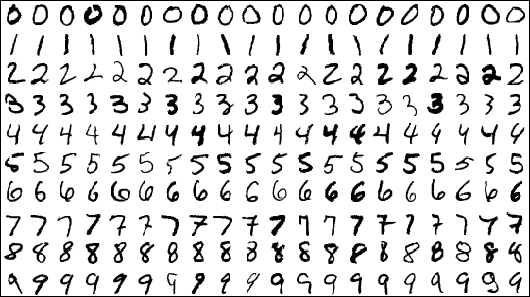

Pytorch и Catalyst имеют одни и те же 4 шага для подготовки данных:
   - загрузка изображений;
   - разделение их на тренировочный и валидационный наборы;
   - преобразование;
   - оборачивание каждой выборки в DataLoader.


In [108]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# 1-3
train_dataset = MNIST("./mnist", train=True, download=True, transform=ToTensor())
valid_dataset = MNIST("./mnist", train=False, download=True, transform=ToTensor())
# 4
train_loader = DataLoader(train_dataset, batch_size=32)
valid_loader = DataLoader(valid_dataset, batch_size=32)

**Модель**

Создадим 3-слойную полносвязную нейронную сеть, которая принимает в качестве входных данных изображение размером 28x28 и выводит распределение вероятностей по 10 возможным лейблам. Для этого используем датасет MNIST.

In [109]:
from torch import nn

net = nn.Sequential(
    nn.Linear(28 * 28, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
)

**Оптимизатор**

В качестве оптимизатора будем использовать Adam.

In [111]:
from catalyst.contrib.nn.optimizers import Lamb, Lookahead, RAdam, QHAdamW

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

**Функция ошибки**

В качестве функции потерь будем использовать кросс-энтропию, так как мы хотим взять наши логарифмы и вычислить расхождение между двумя вероятностными распределениями.

In [112]:
criterion = nn.CrossEntropyLoss()

**Тренировочный цикл**

И здесь мы подходим к преимуществам Catalyst. В PyTorch вы сами пишете цикл for, а это значит, что вы должны помнить о всех мелочах — в этом месте можно наделать много ошибок. Даже если ваша модель проста, она не будет такой, как только вы начнете совершать более сложные вещи, такие как использование нескольких графических процессоров,, 16-битная точность и т.д.\
Полный код на PyTorch:
```python

# the data
train_dataset = MNIST("./mnist", train=True, download=True, transform=ToTensor())
valid_dataset = MNIST("./mnist", train=False, download=True, transform=ToTensor())
train_loader = DataLoader(train_dataset, batch_size=32)
valid_loader = DataLoader(valid_dataset, batch_size=32)

# the model
model = nn.Sequential(
    nn.Linear(28 * 28, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
)

# the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# the loss
criterion = nn.CrossEntropyLoss()

num_epochs = 1
for epoch in range(num_epochs):

    # train
    for train_batch in train_loader:
        x, y = train_batch
        x = x.view(len(x), -1)

        logits = model(x)
        loss = criterion(logits, y)
        print("train loss: ", loss.item())

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

    # validation
    with torch.no_grad():
        valid_loss = []
        for valid_batch in valid_loader:
            x, y = valid_batch
            x = x.view(len(x), -1)
            logits = model(x)
            valid_loss.append(criterion(logits, y).item())

        valid_loss = torch.mean(torch.tensor(valid_loss))
        print("valid loss: ", valid_loss.item())
```
Пример MNIST с Catalyst точно такой же, но:
   - код цикла обучения/валидации был абстрагирован;
   - вы указали ключевую точку как для части обучения, так и для части вывода
   - вы получаете автоматическую проверку модели и контрольные точки
   - вы можете сосредоточиться только на ключевых частях вашего исследования
   

In [113]:
from catalyst import dl


# the data
train_dataset = MNIST("./mnist", train=True, download=True, transform=ToTensor())
valid_dataset = MNIST("./mnist", train=False, download=True, transform=ToTensor())
train_loader = DataLoader(train_dataset, batch_size=32)
valid_loader = DataLoader(valid_dataset, batch_size=32)

# the model
model = nn.Sequential(
    nn.Linear(28 * 28, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
)

# the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# the loss
criterion = nn.CrossEntropyLoss()

# runner
class CustomRunner(dl.Runner):
    
    def predict_batch(self, batch):
        # model inference step
        return self.model(batch[0].to(self.device).view(batch[0].size(0), -1))
    
    def _handle_batch(self, batch):
        x, y = batch
        x = x.view(len(x), -1)
        logits = self.model(x)
        loss = self.state.criterion(logits, y)
        self.state.batch_metrics["loss"] = loss
        
        if self.state.is_train_loader:
            loss.backward()
            self.state.optimizer.step()
            self.state.optimizer.zero_grad()            

runner = CustomRunner()
# model training
runner.train(
    loaders={"train": train_loader, "valid": valid_loader},
    model=model, criterion=criterion, optimizer=optimizer,
    num_epochs=1, logdir="./logs", verbose=True,
)
# model inference
for prediction in runner.predict_loader(loader=valid_loader):
    assert prediction.detach().cpu().numpy().shape[-1] == 10
# model tracing
traced_model = runner.trace(loader=valid_loader)



1/1 * Epoch (train):   0% 0/1875 [00:00<?, ?it/s]
1/1 * Epoch (train):   0% 0/1875 [00:04<?, ?it/s, loss=2.300]
1/1 * Epoch (train):   0% 1/1875 [00:04<2:09:47,  4.16s/it, loss=2.300]
1/1 * Epoch (train):   0% 1/1875 [00:04<2:09:47,  4.16s/it, loss=2.286]
1/1 * Epoch (train):   0% 2/1875 [00:04<2:09:43,  4.16s/it, loss=2.259]
1/1 * Epoch (train):   0% 3/1875 [00:04<2:09:39,  4.16s/it, loss=2.226]
1/1 * Epoch (train):   0% 4/1875 [00:04<2:09:35,  4.16s/it, loss=2.243]
1/1 * Epoch (train):   0% 5/1875 [00:04<2:09:31,  4.16s/it, loss=2.240]
1/1 * Epoch (train):   0% 6/1875 [00:04<1:30:49,  2.92s/it, loss=2.240]
1/1 * Epoch (train):   0% 6/1875 [00:04<1:30:49,  2.92s/it, loss=2.157]
1/1 * Epoch (train):   0% 7/1875 [00:04<1:30:46,  2.92s/it, loss=2.152]
1/1 * Epoch (train):   0% 8/1875 [00:04<1:30:43,  2.92s/it, loss=2.171]
1/1 * Epoch (train):   0% 9/1875 [00:04<1:30:40,  2.92s/it, loss=2.089]
1/1 * Epoch (train):   1% 10/1875 [00:04<1:30:37,  2.92s/it, loss=2.111]
1/1 * Epoch (train):  

TracingCheckError: Tracing failed sanity checks!
encountered an exception while running the trace with test inputs.
Exception:
	Cannot compare two tensors on different devices. Got: cuda:0 and cuda:1
ERROR: Graphs differed across invocations!
	Graph diff:
		  graph(%self : __torch__.catalyst.utils.tracing._ForwardOverrideModel,
		        %obj : Tensor):
		-   %2 : __torch__.torch.nn.parallel.data_parallel.DataParallel = prim::GetAttr[name="model"](%self)
		-   %3 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="module"](%2)
		-   %4 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="4"](%3)
		-   %5 : Tensor = prim::GetAttr[name="bias"](%4)
		-   %6 : __torch__.torch.nn.parallel.data_parallel.DataParallel = prim::GetAttr[name="model"](%self)
		-   %7 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="module"](%6)
		-   %8 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="4"](%7)
		-   %9 : Tensor = prim::GetAttr[name="weight"](%8)
		-   %10 : __torch__.torch.nn.parallel.data_parallel.DataParallel = prim::GetAttr[name="model"](%self)
		-   %11 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="module"](%10)
		-   %12 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="2"](%11)
		-   %13 : Tensor = prim::GetAttr[name="bias"](%12)
		-   %14 : __torch__.torch.nn.parallel.data_parallel.DataParallel = prim::GetAttr[name="model"](%self)
		-   %15 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="module"](%14)
		-   %16 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="2"](%15)
		-   %17 : Tensor = prim::GetAttr[name="weight"](%16)
		-   %18 : __torch__.torch.nn.parallel.data_parallel.DataParallel = prim::GetAttr[name="model"](%self)
		-   %19 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="module"](%18)
		-   %20 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="0"](%19)
		-   %21 : Tensor = prim::GetAttr[name="bias"](%20)
		-   %22 : __torch__.torch.nn.parallel.data_parallel.DataParallel = prim::GetAttr[name="model"](%self)
		-   %23 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="module"](%22)
		-   %24 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="0"](%23)
		-   %25 : Tensor = prim::GetAttr[name="weight"](%24)
		-   %26 : (Tensor, Tensor) = ^Scatter([0, 1], None, 0)(%obj) # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/scatter_gather.py:13:0
		?     -
		+   %2 : (Tensor, Tensor) = ^Scatter([0, 1], None, 0)(%obj) # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/scatter_gather.py:13:0
		-   %27 : (Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor) = ^Broadcast([0, 1])(%25, %21, %17, %13, %9, %5) # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/replicate.py:71:0
		    %i.1 : Tensor = prim::Constant[value=<Tensor>]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/scatter_gather.py:55:0
		    %i : Tensor = prim::Constant[value=<Tensor>]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/scatter_gather.py:55:0
		-   %30 : Tensor = ^Gather(0, 0)(%i.1, %i) # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/scatter_gather.py:55:0
		?    ^^
		+   %5 : Tensor = ^Gather(0, 0)(%i.1, %i) # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/scatter_gather.py:55:0
		?    ^
		-   %31 : int = prim::Constant[value=32]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?    ^^
		+   %6 : int = prim::Constant[value=32]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?    ^
		-   %32 : int = prim::Constant[value=10]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?    ^^
		+   %7 : int = prim::Constant[value=10]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?    ^
		-   %33 : int[] = prim::ListConstruct(%31, %32)
		?    ^^                                ^^   ^^
		+   %8 : int[] = prim::ListConstruct(%6, %7)
		?    ^                                ^   ^
		-   %34 : int = prim::Constant[value=6]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?    ^^
		+   %9 : int = prim::Constant[value=6]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?    ^
		+   %10 : int = prim::Constant[value=0]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		+   %11 : Device = prim::Constant[value="cuda:0"]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		+   %12 : bool = prim::Constant[value=0]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		-   %35 : int = prim::Constant[value=0]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?     -
		+   %13 : int = prim::Constant[value=0]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?    +
		-   %36 : Device = prim::Constant[value="cuda:0"]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		-   %37 : bool = prim::Constant[value=0]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		-   %38 : int = prim::Constant[value=0]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		-   %39 : Tensor = aten::empty(%33, %34, %35, %36, %37, %38) # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?    ^^                          --------------------------
		+   %14 : Tensor = aten::empty(%8, %9, %10, %11, %12, %13) # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?    ^^                         ++++++++++++++++++++++++
		-   %40 : int = prim::Constant[value=16]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		-   %41 : int = prim::Constant[value=16]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?    -
		+   %15 : int = prim::Constant[value=16]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?     +
		+   %16 : int = prim::Constant[value=16]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		-   %42 : int[] = prim::ListConstruct(%40, %41)
		?    ^^                                ^^   -
		+   %17 : int[] = prim::ListConstruct(%15, %16)
		?    ^^                                ^^    +
		-   %43 : int = prim::Constant[value=0]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?    ^^
		+   %18 : int = prim::Constant[value=0]() # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?    ^^
		-   %44 : Tensor[] = aten::split_with_sizes(%39, %42, %43) # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?    ^^                                      ^^   ^^   ^^
		+   %19 : Tensor[] = aten::split_with_sizes(%14, %17, %18) # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?    ^^                                      ^^   ^^   ^^
		-   %45 : Tensor, %46 : Tensor = prim::ListUnpack(%44)
		?    ^^            ^^                              ^^
		+   %20 : Tensor, %21 : Tensor = prim::ListUnpack(%19)
		?    ^^            ^^                              ^^
		+   %22 : bool = prim::Constant[value=0]()
		+   %23 : Tensor = aten::copy_(%20, %i.1, %22) # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		-   %47 : bool = prim::Constant[value=0]()
		?     -
		+   %24 : bool = prim::Constant[value=0]()
		?    +
		-   %48 : Tensor = aten::copy_(%45, %i.1, %47) # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		-   %49 : bool = prim::Constant[value=0]()
		-   %50 : Tensor = aten::copy_(%46, %i, %49) # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?     -                         ^^        -
		+   %25 : Tensor = aten::copy_(%21, %i, %24) # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/comm.py:230:0
		?    +                          ^^       +
		-   return (%30)
		?            ^^
		+   return (%5)
		?            ^
	First diverging operator:
	Node diff:
		- %2 : __torch__.torch.nn.parallel.data_parallel.DataParallel = prim::GetAttr[name="model"](%self)
		+ %2 : (Tensor, Tensor) = ^Scatter([0, 1], None, 0)(%obj) # /opt/conda/lib/python3.6/site-packages/torch/nn/parallel/scatter_gather.py:13:0
	Check source location:
		/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/scatter_gather.py(13): scatter_map
		/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/scatter_gather.py(15): scatter_map
		/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/scatter_gather.py(28): scatter
		/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/scatter_gather.py(36): scatter_kwargs
		/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py(168): scatter
		/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py(157): forward
		/opt/conda/lib/python3.6/site-packages/catalyst/utils/tracing.py(68): forward
		/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py(709): _slow_forward
		/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py(725): _call_impl
		/opt/conda/lib/python3.6/site-packages/torch/jit/_trace.py(940): trace_module
		/opt/conda/lib/python3.6/site-packages/torch/jit/_trace.py(335): _check_trace
		/opt/conda/lib/python3.6/site-packages/torch/autograd/grad_mode.py(26): decorate_context
		/opt/conda/lib/python3.6/site-packages/torch/jit/_trace.py(966): trace_module
		/opt/conda/lib/python3.6/site-packages/torch/jit/_trace.py(742): trace
		/opt/conda/lib/python3.6/site-packages/catalyst/utils/tracing.py(96): __call__
		<ipython-input-113-1ffb9080a93b>(30): predict_batch
		/opt/conda/lib/python3.6/site-packages/catalyst/runners/runner.py(449): predict_fn
		/opt/conda/lib/python3.6/site-packages/catalyst/utils/tracing.py(157): trace_model
		/opt/conda/lib/python3.6/site-packages/catalyst/runners/runner.py(462): trace
		<ipython-input-113-1ffb9080a93b>(55): <module>
		/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py(3331): run_code
		/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py(3254): run_ast_nodes
		/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py(3063): run_cell_async
		/opt/conda/lib/python3.6/site-packages/IPython/core/async_helpers.py(68): _pseudo_sync_runner
		/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py(2886): _run_cell
		/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py(2858): run_cell
		/opt/conda/lib/python3.6/site-packages/ipykernel/zmqshell.py(539): run_cell
		/opt/conda/lib/python3.6/site-packages/ipykernel/ipkernel.py(302): do_execute
		/opt/conda/lib/python3.6/site-packages/tornado/gen.py(162): _fake_ctx_run
		/opt/conda/lib/python3.6/site-packages/tornado/gen.py(234): wrapper
		/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py(542): execute_request
		/opt/conda/lib/python3.6/site-packages/tornado/gen.py(162): _fake_ctx_run
		/opt/conda/lib/python3.6/site-packages/tornado/gen.py(234): wrapper
		/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py(265): dispatch_shell
		/opt/conda/lib/python3.6/site-packages/tornado/gen.py(162): _fake_ctx_run
		/opt/conda/lib/python3.6/site-packages/tornado/gen.py(234): wrapper
		/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py(362): process_one
		/opt/conda/lib/python3.6/site-packages/tornado/gen.py(775): run
		/opt/conda/lib/python3.6/site-packages/tornado/gen.py(162): _fake_ctx_run
		/opt/conda/lib/python3.6/site-packages/tornado/gen.py(814): inner
		/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py(741): _run_callback
		/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py(688): <lambda>
		/opt/conda/lib/python3.6/asyncio/events.py(145): _run
		/opt/conda/lib/python3.6/asyncio/base_events.py(1462): _run_once
		/opt/conda/lib/python3.6/asyncio/base_events.py(442): run_forever
		/opt/conda/lib/python3.6/site-packages/tornado/platform/asyncio.py(199): start
		/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py(612): start
		/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py(664): launch_instance
		/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py(16): <module>
		/opt/conda/lib/python3.6/runpy.py(85): _run_code
		/opt/conda/lib/python3.6/runpy.py(193): _run_module_as_main


Дополнительные возможности Catalyst:
   - С помощью Catalyst.dl и Catalyst.contrib цикл обучения может быть упрощен. Вы получаете доступ к множеству предопределенных метрик
   - Callbacks
   - визуализация Catalyst (Alchemy, Neptune, Tensorboard, Wandb)
   - большое количество модулей contrib, поддерживаемых сообществом Catalyst
   - лучшие практики глубокого обучения, такие как функция " load_best_
   
**Дополнительная информация**

1. Официальная страница: https://catalyst-team.com/
2. GitHub: https://github.com/catalyst-team/catalyst